lotto 데이터는 1회부터 859회까지의 로또 당첨번호를 담고 있는 데이터이며 변수 설명은 아래와 같다. 
- time_id : 수치형 - 로또 회차
- numN : 수치형 - 해당 회의 N번 째 당첨번호 6개

In [1]:
import pandas as pd
df = pd.read_csv('lotto.csv')
df.head()

,time_id,num1,num2,num3,num4,num5,num6
0,859,8,22,35,38,39,41
1,858,9,13,32,38,39,43
2,857,6,10,16,28,34,38
3,856,10,24,40,41,43,44
4,855,8,15,17,19,43,44


1. 연관규칙분석을 수행하기 위해 lotto 데이터셋을 transaction 데이터로 변환하시오.(단, 본 분석에서는 로또 번호가 추첨된 순서는 고려하지 않고 분석을 수행)
그리고 변환된 데이터에서 가장 많이 등장한 상위 10개의 로또 번호를 막대그래프로 출력하고 이에 대해 설명하시오.

In [10]:
from mlxtend.preprocessing import TransactionEncoder
df2 = df.drop(columns='time_id').values.tolist()
te = TransactionEncoder()
te_ary = te.fit_transform(df2)
print(te.columns_)
te_ary

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]


array([[False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [14]:
te_ary[0]

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False,  True, False, False, False, False])

In [42]:
from collections import Counter
df_tr = pd.DataFrame(te_ary,columns=te.columns_)
df_count = pd.DataFrame(columns=['num','count_true'])

for i in df_tr.columns:
    c = Counter(df_tr[i])
    df_count = df_count.append({'num':i,'count_true':c[True]},ignore_index=True)
    
df_count

C:\Users\suhye\AppData\Local\Temp\ipykernel_4568\1895102606.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_count = df_count.append({'num':i,'count_true':c[True]},ignore_index=True)
C:\Users\suhye\AppData\Local\Temp\ipykernel_4568\1895102606.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_count = df_count.append({'num':i,'count_true':c[True]},ignore_index=True)
C:\Users\suhye\AppData\Local\Temp\ipykernel_4568\1895102606.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_count = df_count.append({'num':i,'count_true':c[True]},ignore_index=True)
C:\Users\suhye\AppData\Local\Temp\ipykernel_4568\1895102606.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

,num,count_true
0,1,122
1,2,112
2,3,111
3,4,115
4,5,119
5,6,108
6,7,114
7,8,119
8,9,89
9,10,122


In [45]:
df_count.sort_values(by='count_true',ascending=False,inplace=True)
df_count[:10]


,num,count_true
33,34,134
26,27,126
39,40,126
42,43,125
19,20,124
16,17,123
11,12,123
9,10,122
12,13,122
13,14,122


Text(0, 0.5, 'Count')

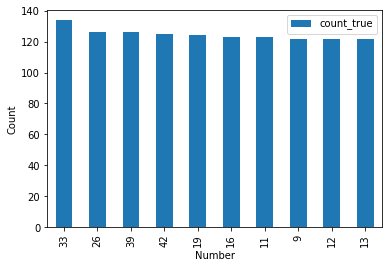

In [46]:
import matplotlib.pyplot as plt
df_count[:10].plot(kind='bar',y=['count_true'])
plt.xlabel('Number')
plt.ylabel('Count')

2. 변환한 데이터에 대해 apiriori 함수를 사용하여 다음 괄호 안의 조건을 반영하여 연관규칙을 생성하고, 이를 'rules_1'이라는 변수에 저장하여 결과를 해석하시오.(최소 지지도 : 0.002, 최소 신뢰도 : 0.8, 최소 조합 항목 수 : 2, 최대 조합 항목 수 : 6) 그리고 도출된 연관규칙들을 향상도를 기준으로 정렬하여 상위 30개의 규칙을 확인하고, 이를 데이터 프레임으로 변환하여 csv 파일로 출력하시오.

In [88]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

df = pd.DataFrame(te_ary,columns=te.columns_)

#지지도가 0.02 이상인 항목
frequent_itemsets = apriori(df,min_support=0.002,use_colnames=True,max_len = 6)

#신뢰도가 0.8 이상인 빈번항목집합
confidence_itemsets = association_rules(frequent_itemsets,metric='confidence',min_threshold=0.8)
confidence_itemsets

#규칙의 길이 추출
confidence_itemsets['length'] = confidence_itemsets['antecedents'].apply(lambda x: len(x))

#최소 조합 항목수 2 이상인 규칙 추출
confidence_itemsets = confidence_itemsets[confidence_itemsets['length'] >= 2]
confidence_itemsets


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,"(1, 3, 43)",(12),0.002328,0.143190,0.002328,1.0,6.983740,0.001995,inf,3
1,"(1, 3, 15)",(25),0.002328,0.129220,0.002328,1.0,7.738739,0.002027,inf,3
2,"(25, 3, 15)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf,3
3,"(25, 3, 20)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf,3
4,"(29, 3, 37)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf,3
...,...,...,...,...,...,...,...,...,...,...
699,"(16, 26, 43, 31)",(36),0.002328,0.133877,0.002328,1.0,7.469565,0.002017,inf,4
700,"(16, 43, 36)","(26, 31)",0.002328,0.015134,0.002328,1.0,66.076923,0.002293,inf,3
701,"(16, 26, 36)","(43, 31)",0.002328,0.018626,0.002328,1.0,53.687500,0.002285,inf,3
702,"(16, 26, 43)","(36, 31)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,3


In [92]:
confidence_itemsets.sort_values(by='lift',ascending=False,inplace=True)

rules_1 = pd.DataFrame(confidence_itemsets[:30],columns=confidence_itemsets.columns)
rules_1.to_csv('rules_1.csv',index=False)


3. 생성된 연관규칙 'rules_1'에 대한 정보를 해석하고, 1번 문제를 통해 확인했을 때 가장 많이 추첨된 번호가 우측항에 존재하는 규칙들만을 'rules_most_freq'라는 변수에 저장하시오. 그리고 해당 규칙들을 해석하여 인사이트를 도출한 후 서술하시오.

In [132]:
top10 = df_count[:10]['num'].to_list()
top10

[34, 27, 40, 43, 20, 17, 12, 10, 13, 14]

In [133]:
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
703,"(16, 26, 31)","(43, 36)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,3
642,"(34, 31, 7)","(24, 22)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,3
643,"(24, 34, 22)","(31, 7)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,3
682,"(26, 21, 14)","(18, 15)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,3
652,"(34, 10, 36)","(44, 22)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,3
646,"(24, 22, 31)","(34, 7)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,3
666,"(24, 20, 15)","(12, 30)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,3
702,"(16, 26, 43)","(36, 31)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,3
700,"(16, 43, 36)","(26, 31)",0.002328,0.015134,0.002328,1.0,66.076923,0.002293,inf,3
653,"(34, 10, 22)","(36, 44)",0.002328,0.016298,0.002328,1.0,61.357143,0.002290,inf,3


In [103]:
rules_most_frequence = rules_1[rules_1['antecedents'] in top10]
rules_most_frequence

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [123]:
top10.value

AttributeError: 'list' object has no attribute 'value'

In [146]:
m_list = []
for i in rules_1['antecedents']:
    for j in top10:
        if j in list(i):
            print(rules_1.iloc[i])

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'frozenset'

In [153]:
for i,j in zip(rules_1['antecedents'],top10):
    print(i)
    print(j)

frozenset({16, 26, 31})
34
frozenset({34, 31, 7})
27
frozenset({24, 34, 22})
40
frozenset({26, 21, 14})
43
frozenset({34, 10, 36})
20
frozenset({24, 22, 31})
17
frozenset({24, 20, 15})
12
frozenset({16, 26, 43})
10
frozenset({16, 43, 36})
13
frozenset({34, 10, 22})
14


In [152]:
rules_1[:,2]

InvalidIndexError: (slice(None, None, None), 2)